<a href="https://colab.research.google.com/github/moinkhan318/Diabetes-prediction/blob/main/Bank_Churn_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

# Predicting Customer Churn Using Logistic Regression**

**Objective:**
The objective of this project is to develop a predictive model using logistic regression to identify customers at risk of churn in a telecom company. By analyzing customer demographic data, account information, and usage patterns, the goal is to provide actionable insights that can help the company implement targeted retention strategies to reduce churn rates and improve customer satisfaction.

**Data Source**

The data source for a bank churn model typically consists of various types of customer information that can help predict whether a customer is likely to leave (churn) the bank. The data used to build and train such a model usually includes:

Common Data Sources for Bank Churn Models
1.Customer Demographics:

Age
Gender
Marital status
Employment status
Number of dependents
2.Account Information:

Account type (savings, checking, etc.)
Account balance
Account opening date
Number of accounts held
Transaction Data:

3.Transaction frequency
Transaction amounts
Types of transactions (deposits, withdrawals, transfers)
Recurring transactions (e.g., salary deposits, utility payments)
Customer Behavior:

4.Online banking usage
Mobile app usage
Frequency of branch visits
Customer service interactions (calls, emails, chat sessions)
Feedback and complaints
Product Usage:

5.Credit card usage
Loan products (personal, home, auto)
Investment products (mutual funds, fixed deposits)
Insurance products


#  library Import

Pandas library ,
Matplotlib library,StandardScaler, LabelEncoder,accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_recall_curve


In [1]:
import pandas as pd
data=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
data


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Data Visualization**

In [2]:
data.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object

In [3]:

non_numeric_cols = data.select_dtypes(include=["object"]).columns.tolist()
non_numeric_cols



['Surname', 'Geography', 'Gender']

In [ ]:
data.drop(non_numeric_cols, axis=1, inplace=True)

In [ ]:
data.head()    # Details of first five data of data frame

,CustomerId,CreditScore,Age,Tenure,Num Of Products,Has Credit Card,Is Active Member,Churn
0,15634602,619,42,2,1,1,1,1
1,15647311,608,41,1,1,0,1,0
2,15619304,502,42,8,3,1,0,1
3,15701354,699,39,1,2,0,0,0
4,15737888,850,43,2,1,1,1,0


In [4]:
#  Using dataframe data:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Describe data

In [5]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [7]:
data.shape #get shape of the data frame

(10000, 13)

In [8]:
data.size #get total number of elements in the data frame

130000

In [9]:
data.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [10]:
data.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object

In [11]:
data['Churn'].value_counts()   #count of each category

Churn
0    7963
1    2037
Name: count, dtype: int64

 define target (y) and features (X)

In [12]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [13]:
y=data['Churn']
X=data.drop(['CustomerId','Churn'],axis=1)

**train test split**

In [14]:

X=data.drop('CustomerId', axis=1)
y=data['CustomerId']

In [15]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [42]:
X = data.drop(columns=['CustomerId', 'Surname', 'Churn'])
y = data['Churn']


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)



In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [64]:
X_train_cleaned = X_train.dropna(axis=0, how='any')
y_train_cleaned = y_train.dropna(axis=0, how='any')

In [65]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [66]:
model.fit(X_train,y_train)


LogisticRegression(max_iter=5000)

In [51]:
model.intercept_

array([-0.00018741])

In [52]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [67]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [68]:
print(y_prob)

[0.14800009 0.47850825 0.20911008 ... 0.30302097 0.44453654 0.29455667]


In [69]:
print(y_test)

337     0
1022    0
1174    1
3923    0
2863    0
       ..
5470    0
8563    1
2435    0
7988    0
1553    0
Name: Churn, Length: 3000, dtype: int64


In [70]:
print(X_test)

      CreditScore  Geography  Gender  Age  Tenure    Balance  Num Of Products  \
337           649          0       1   33       2       0.00                2   
1022          547          0       0   48       1  179380.74                2   
1174          705          2       0   40       5  203715.15                1   
3923          764          0       1   41       7       0.00                2   
2863          755          0       0   43       9       0.00                2   
...           ...        ...     ...  ...     ...        ...              ...   
5470          617          0       1   25       1  102585.88                2   
8563          578          0       1   45       1  148600.91                1   
2435          608          1       1   42       8  131390.75                2   
7988          516          0       1   51       8  120124.35                2   
1553          592          0       0   38       8  119278.01                2   

      Has Credit Card  Is A

**Model Evaluation**

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_recall_curve

In [59]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

In [60]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)
print(f"AUC: {auc}")

Accuracy: 0.7996666666666666
Confusion Matrix:
[[2368   46]
 [ 555   31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2414
           1       0.40      0.05      0.09       586

    accuracy                           0.80      3000
   macro avg       0.61      0.52      0.49      3000
weighted avg       0.73      0.80      0.73      3000

AUC: 0.6741356591668056


**Explaination**

In [61]:
import matplotlib.pyplot as plt #importing matplotlib

In [62]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

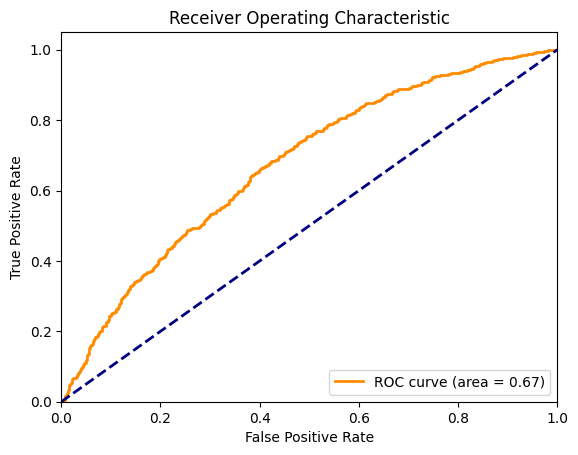

AUC: 0.6741356591668056


In [63]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {auc}")